In [2]:
### 优化与深度学习的关系

# 关联：优化为深度学习提供了最小化损失函数（目标函数）的方法
# 目标不同：优化是为了降低训练误差，深度学习是为了降低泛化误差

###　优化在深度学习中的挑战：
# 1. 局部最小值
#２．鞍点

In [4]:
import sys
sys.path.append('../d2lzh/')
import d2lzh_pytorch as d2l
from mpl_toolkits import mplot3d # 三维作图
import numpy as np

### 1. 局部最小值

如果函数f(x)在x上的数值比邻近的数值更小，那么该数值就有可能是局部最小值.

示例：$$ f(x) = x \ \text{cos}(\pi x), x \in [-1.0, 2.0] $$

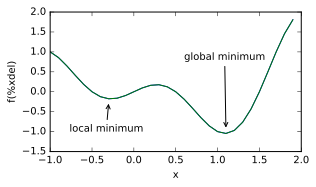

In [6]:
def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', 
                  xy=(-0.3, -0.25),
                 xytext=(-0.77, -1.0),
                 arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum',
                 xy=(1.1, -0.95),
                 xytext=(0.6, 0.8),
                 arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(%xdel)')
d2l.plt.show()

从上图可以看出，一个目标函数可能包含多个局部最小值，而由于在局部最小值附近的点上梯度为零或接近于零，最终迭代求得的数值解可能只是目标函数的local minimum而不是global minimum.

### 2. 鞍点

当梯度接近零或变为零，除了上述的局部最小值，还有一种可能是鞍点（saddle point).

**例子**

$$ f(x) = x^3 $$

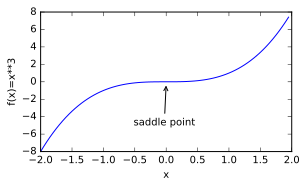

In [8]:
x = np.arange(-2.0, 2.0, 0.05)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point',
                 xy=(0, -0.2),
                 xytext=(-0.52, -5.0),
                 arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)=x**3')
d2l.plt.show()

**二维空间的例子**

$$ f(x,y) = x^2 - y^2 $$

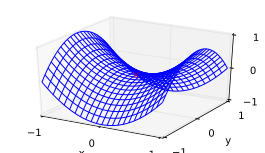

In [15]:
x, y = np.mgrid[-1:1:45j, -1:1:45j]
z = x**2 - y ** 2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride':2, 'cstride':2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.plt.show()

假设函数的输入是$k$维向量，输出为标量，则其Hessian matrix有$k$个特征值。该函数在梯度为零的位置上，可能取得局部最小值、局部最大值或鞍点。

* 函数的Hessian matrix在梯度为零的位置上，特征值大于零，则该函数得到局部最小值。
* 函数的Hessian matrix在梯度为零的位置上，特征值小于零，则该函数得到局部最大值。
* 函数的Hessian matrix在梯度为零的位置上，特征值有正有负，则该函数到达鞍点位置。

从随机矩阵理论出发，到达鞍点的概率要大于到达局部最小值的概率。